<a href="https://colab.research.google.com/github/meherdurdana/Resume-Selection-with-ML/blob/main/Resume_Selection_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary library and the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('ResumeDataSet.csv')
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# Look and visualize at the categories

In [ ]:
print(data['Category'].unique())
print("total unique category: {}". format (len(data['Category'].unique())))

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
total unique category: 25


In [ ]:
print(data['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

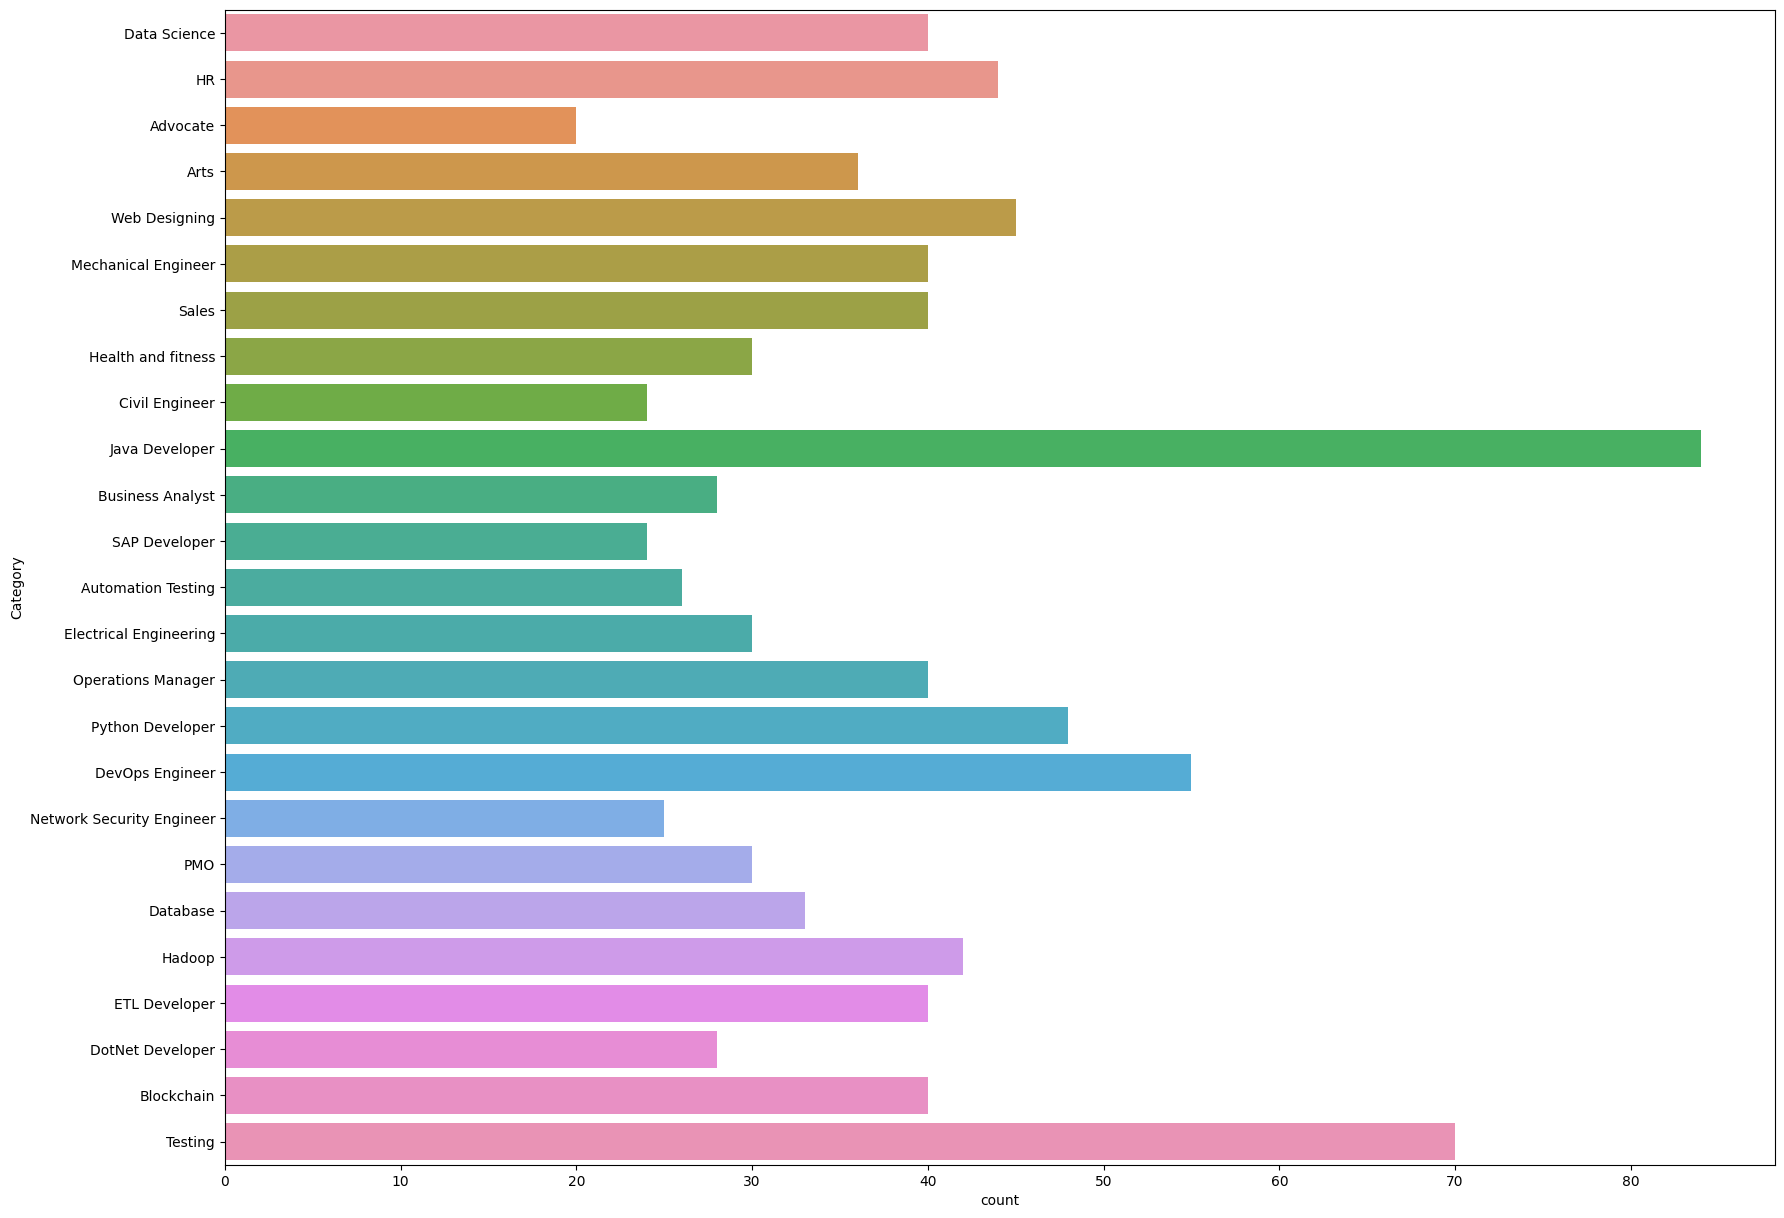

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.countplot(y="Category",data=data)

# Visualize the distribution of categories

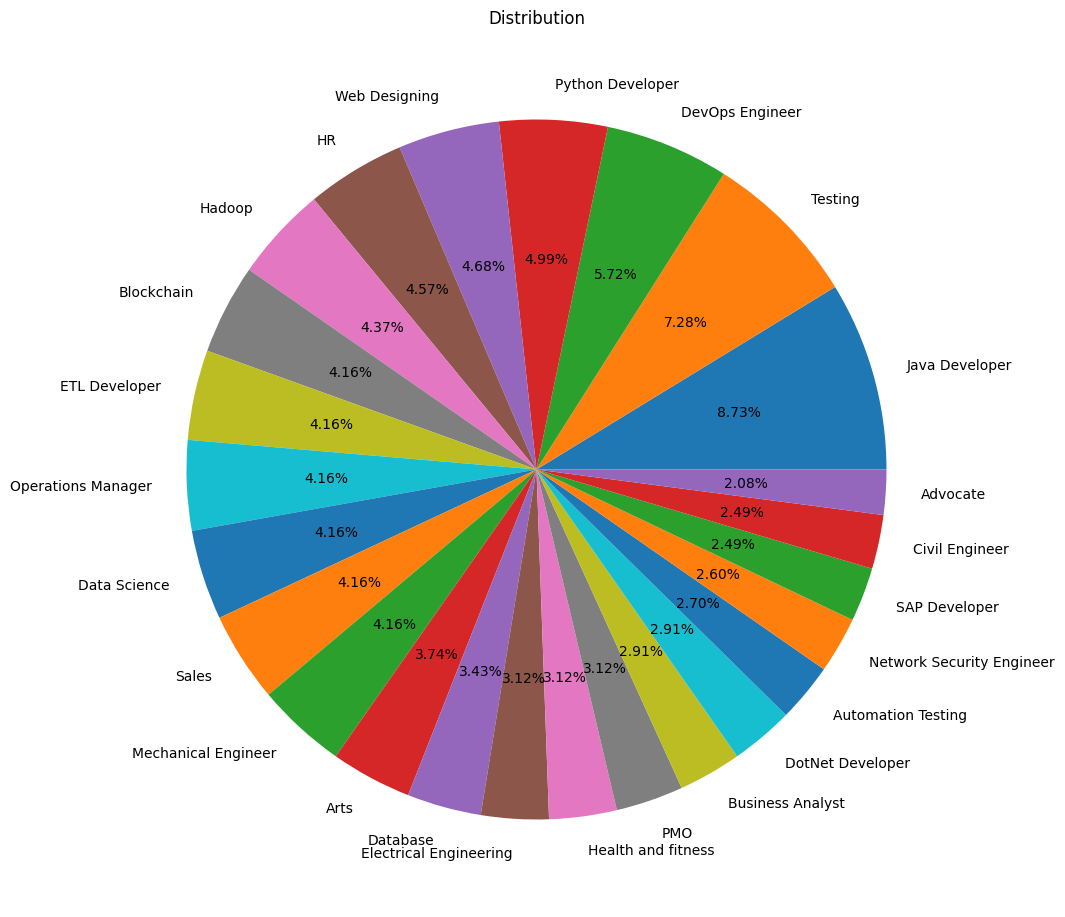

In [ ]:
from matplotlib.gridspec import GridSpec
count = data['Category'].value_counts()
label = data['Category'].value_counts().keys()

plt.figure(1, figsize=(25,25))
grid=GridSpec(2,2)

cmap = plt.get_cmap('coolwarm')

color = [cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(grid[0,1], aspect=1, title='Distribution')

pie = plt.pie(count, labels=label, autopct='%1.2f%%')
plt.show()

# Remove the URLs, hashtags,mentions, special letter, and punctuations

In [ ]:
import re

def clean(text):
        text=re.sub('http\S+\s*', ' ', text)#URL
        text=re.sub('RT|cc', ' ', text)#RT and cc/ special letters
        text=re.sub('#\S+', '', text)#hashtag
        text=re.sub('@\S+', '', text)#mentions
        text=re.sub('[%s]' % re.escape("""|"#$%&'()*+,-./:;<=>?@[\]~"""), ' ', text)#punctuations
        text=re.sub('\s+', ' ', text)#whitespace character
        text=re.sub(r'[^\x00-\x7f]',r' ', text)#non-ASCII characters

        return text

data['clean text']=data.Resume.apply(lambda x: clean(x))

In [ ]:
data['clean text']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills     R     Python     SAP HANA     Table...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills     Proficient in MS office Wo...
958        Willingness to a ept the challenges     Po...
959    PERSONAL SKILLS     Quick learner     Eagernes...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: clean text, Length: 962, dtype: object

# Plot word cloud image

In [ ]:
pip show wordcloud

Name: wordcloud
Version: 1.9.2
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: Andreas Mueller
Author-email: t3kcit+wordcloud@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords=set(stopwords.words('english')+['``',"''"])

total_words=[] #store words one at a time in a list
sentences=data['Resume'].values #retrieves the values from the 'Resume'
cleanSentences ="" #store the concatenated cleaned sentences

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)

word_freq_dist=nltk.FreqDist(total_words) #creates a frequency distribution object
most_common=word_freq_dist.most_common(100)

print(most_common)

[('Details', 609), ('Exprience', 580), ('months', 478), ('company', 459), ('description', 427), ('1', 384), ('Project', 269), ('year', 261), ('January', 253), ('Maharashtra', 244), ('6', 225), ('Less', 224), ('data', 223), ('project', 212), ('Skill', 206), ('Data', 203), ('Web', 196), ('application', 192), ('Education', 177), ('I', 174), ('time', 169), ('College', 168), ('Python', 156), ('Science', 154), ('Pune', 154), ('Used', 152), ('Software', 151), ('Engineering', 147), ('The', 146), ('University', 140), ('like', 139), ('Nagpur', 138), ('C', 137), ('SQL', 136), ('monthsCompany', 134), ('Roles', 134), ('B', 132), ('Responsibility', 130), ('developed', 128), ('Technologies', 127), ('2', 123), ('India', 122), ('Designed', 121), ('website', 120), ('Machine', 118), ('UI', 117), ('Learning', 116), ('Developer', 116), ('Mumbai', 115), ('using', 114), ('24', 111), ('Database', 110), ('development', 105), ('Description', 103), ('Responsibilities', 100), ('S', 100), ('A', 99), ('BOOTSTRAP', 

In [ ]:
pip install --upgrade nltk wordcloud

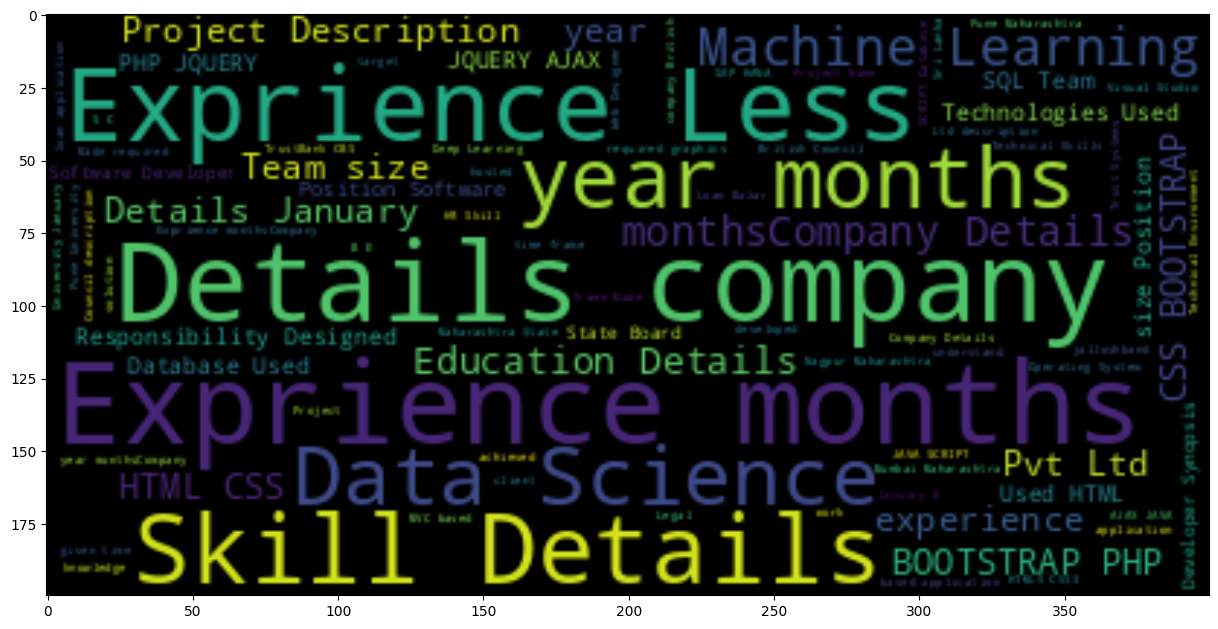

In [ ]:
#This line creates a WordCloud object (WC) and generates a word cloud from the text in the cleanSentences variable. A word cloud represents words from the text with their size proportional to their frequency.
WC=WordCloud().generate(cleanSentences)
plt.figure(figsize=(15,15))
plt.imshow(WC, interpolation='bilinear')

**Training Machine Learning Model**

In [ ]:
from sklearn.preprocessing import LabelEncoder

var=['Category'] # Define a list called
le = LabelEncoder() # Created an instance

#For each column name in var, you use the fit_transform method of the LabelEncoder to transform the values in the 'Category' column of your dataset (data) into numerical labels. These numerical labels are stored back in the 'Category' column of the data DataFrame.
for i in var:
  data[i]= le.fit_transform(data[i])

In [ ]:
data

,Category,Resume,clean text
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Wo...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Po...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagernes...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
